In [12]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

VECTOR_STORE_DIR = "../vector_store"
DATA_DIR = "../data/processed"


Load Stratified Sample

In [ ]:
stratified_sample = pd.read_pickle(os.path.join(DATA_DIR, "stratified_sample.pkl"))
print("Stratified sample shape:", stratified_sample.shape)
print(stratified_sample['Product'].value_counts())

# Load precomputed chunks
with open(os.path.join(VECTOR_STORE_DIR, "chunks.pkl"), "rb") as f:
    all_chunks = pickle.load(f)

# Load chunk metadata
with open(os.path.join(VECTOR_STORE_DIR, "chunk_metadata.pkl"), "rb") as f:
    all_metadatas = pickle.load(f)

print("Total chunks:", len(all_chunks))
print("Total metadata entries:", len(all_metadatas))


Stratified sample shape: (15000, 21)
Product
Credit card        14727
Money transfers      273
Name: count, dtype: int64
Total chunks: 43759
Total metadata entries: 43759


In [15]:
stratified_sample = pd.read_pickle("../data/processed/stratified_sample.pkl")
print("Loaded precomputed stratified sample:", stratified_sample.shape)


Loaded precomputed stratified sample: (15000, 21)


Calculate Number of Chunks per Complaint

In [18]:
df_meta = pd.DataFrame(all_metadatas)

# Count chunks per complaint
chunks_per_complaint = df_meta.groupby("Complaint ID").size().reset_index()
chunks_per_complaint.columns = ["complaint_id", "num_chunks"]

# Merge product info for analysis
chunks_per_complaint = chunks_per_complaint.merge(
    stratified_sample[["Complaint ID", "Product"]],
    left_on="complaint_id",
    right_on="Complaint ID",
    how="left"
)


Visualization 1: Histogram of Chunks per Complaint

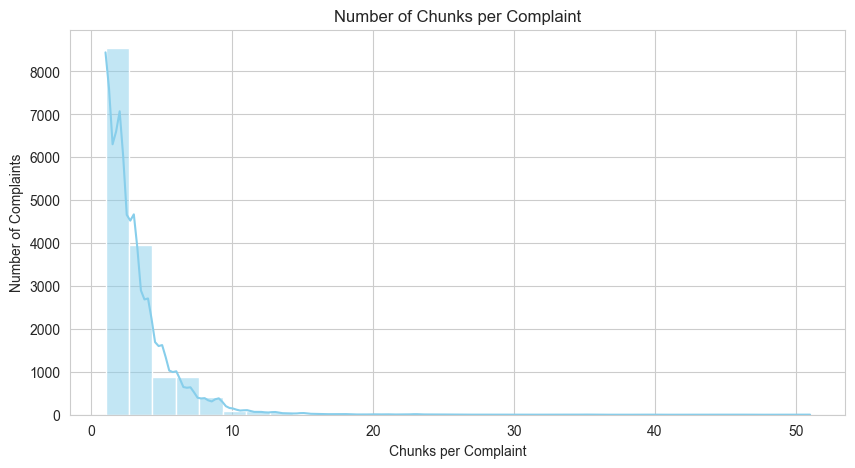

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(chunks_per_complaint["num_chunks"], bins=30, kde=True, color='skyblue')
plt.title("Number of Chunks per Complaint")
plt.xlabel("Chunks per Complaint")
plt.ylabel("Number of Complaints")
plt.show()


Visualization 2: Number of Chunks by Product (Boxplot)

C:\Users\HP\AppData\Local\Temp\ipykernel_15260\1616000953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stratified_sample, x='Product', y='num_chunks', palette="viridis")


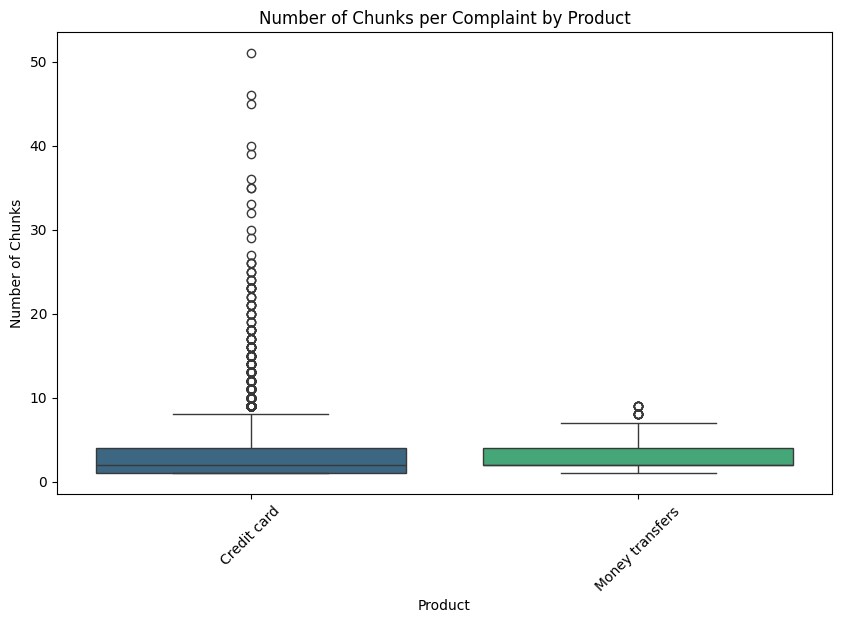

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=stratified_sample, x='Product', y='num_chunks', palette="viridis")
plt.title("Number of Chunks per Complaint by Product")
plt.ylabel("Number of Chunks")
plt.xticks(rotation=45)
plt.show()

Visualization 3: Chunk Length Distribution

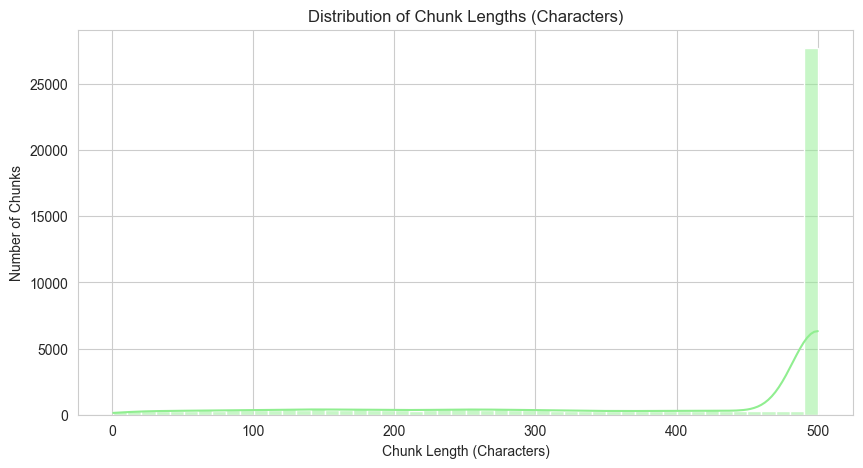

In [21]:
chunk_lengths = [len(chunk) for chunk in all_chunks]

plt.figure(figsize=(10,5))
sns.histplot(chunk_lengths, bins=50, kde=True, color='lightgreen')
plt.title("Distribution of Chunk Lengths (Characters)")
plt.xlabel("Chunk Length (Characters)")
plt.ylabel("Number of Chunks")
plt.show()


In [22]:
summary = chunks_per_complaint.groupby("Product").agg(
    total_complaints=("complaint_id", "nunique"),
    total_chunks=("num_chunks", "sum")
)
summary["avg_chunks_per_complaint"] = summary["total_chunks"] / summary["total_complaints"]
summary


,total_complaints,total_chunks,avg_chunks_per_complaint
Product,,,
Credit card,14727,42923,2.914579
Money transfers,273,836,3.062271
